In [1]:
import keras


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape[0]

60000

AxesImage(72,49.5;446.4x298.98)


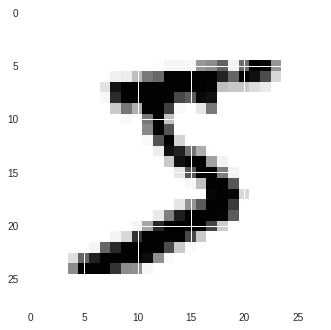

In [5]:
import matplotlib.pyplot as plt
print(plt.imshow(X_train[0]))

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [9]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 3,3,activation='relu'))
model.add(Convolution2D(10,3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 10)        2890      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 10)          910       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 10)          910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2780 - acc: 0.9139
Epoch 2/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0939 - acc: 0.9714
Epoch 3/10
 3232/60000 [>.............................] - ETA: 16s - loss: 0.0677 - acc: 0.9774

60000/60000 [==============================] - 18s 293us/step - loss: 0.0747 - acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0620 - acc: 0.9806
Epoch 5/10
 9504/60000 [===>..........................] - ETA: 14s - loss: 0.0571 - acc: 0.9812

60000/60000 [==============================] - 17s 290us/step - loss: 0.0561 - acc: 0.9822
Epoch 6/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0505 - acc: 0.9844
Epoch 7/10
11232/60000 [====>.........................] - ETA: 14s - loss: 0.0458 - acc: 0.9853

60000/60000 [==============================] - 18s 295us/step - loss: 0.0472 - acc: 0.9850
Epoch 8/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0430 - acc: 0.9866
Epoch 9/10
11776/60000 [====>.........................] - ETA: 14s - loss: 0.0405 - acc: 0.9885

60000/60000 [==============================] - 18s 295us/step - loss: 0.0413 - acc: 0.9870
Epoch 10/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0383 - acc: 0.9882


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.039499432829534636, 0.9873]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[1.2014917e-07 6.1191253e-07 7.5821013e-06 9.4443058e-06 3.1483448e-11
  2.7187019e-10 1.1751031e-14 9.9998224e-01 6.7111805e-09 4.9796096e-08]
 [1.5956553e-03 5.0682458e-04 9.9783605e-01 1.1426669e-06 1.4977489e-08
  6.0179403e-11 2.3783730e-05 1.3947260e-10 3.6539910e-05 6.3594805e-09]
 [1.8894396e-05 9.9935633e-01 5.6702189e-05 7.8812924e-08 4.6256057e-04
  1.7576435e-06 4.8006830e-05 2.1811849e-05 2.9426867e-05 4.3400282e-06]
 [9.9842763e-01 3.4841023e-12 7.6760834e-06 9.5169452e-07 7.2928656e-11
  7.2493538e-07 1.5555854e-03 2.8254340e-11 7.2820008e-06 2.0408991e-07]
 [9.3610564e-10 2.9872322e-08 7.6626513e-08 1.5251520e-09 9.9999094e-01
  1.1671112e-08 2.8513759e-07 1.4494961e-08 8.9286260e-08 8.5334486e-06]
 [2.0205447e-05 9.9965918e-01 3.4824028e-05 4.0580701e-08 2.0287305e-04
  1.9803944e-07 2.9269981e-05 3.6587477e-05 1.2466201e-05 4.2067950e-06]
 [1.8028756e-10 5.1841407e-06 3.4542913e-06 1.0462839e-07 9.9882025e-01
  1.3849500e-05 1.6358564e-08 3.1563201e-07 1.1553828e-03 